<big> 
<center>  
<big>
Lagrangian Derivation of Double Pendulum Equations: <br> <br>   
</big>  
We're given the Lagrangian: <br> <br>
$
\mathbf{L} = \frac{1}{2}(m_1 + m_2)L_1{}^2 \dot{\phi_1}{}^2 + m_2 L_1 L_2 \dot{\phi_1}\dot{\phi_2} \cos(\phi_1 -\phi_2) + \frac{1}{2}m_2 L_2{}^2 \dot{\phi_2}{}^2 - (m_1 + m_2)g L_1 (1-\cos\phi_1) - m_2 g L_2 (1- \cos \phi_2)
$
<br><br>
For the double pendulum. We can use the Euler-Lagrange Equations, <br><br>
$
\frac{\partial \mathbf{L}}{\partial \phi_i} = \frac{d}{dt} \left(\frac{\partial \mathbf{L}}{\partial \dot{\phi_i}} \right)
$ <br> <br>
To obtain the following two coupled second-order differential equations for $\phi_1$ and $\phi_2$: <br><br>

$
(m_1 + m_2)L_1{}^2 \ddot{\phi_1} + m_2 L_1 L_2 \cos(\phi_1 -\phi_2) \ddot{\phi_2} = -m_2 L_1 L_2 \sin(\phi_1 -\phi_2)\dot{\phi_2}{}^2 - (m_1 + m_2) g L_1 \sin\phi_1
$<br><br>
$
m_2 L_1 L_2 \cos(\phi_1 -\phi_2) \ddot{\phi_1} + m_2 L_2{}^2 \ddot{\phi_2} = m_2 L_1 L_2 \sin(\phi_1 -\phi_2) \dot{\phi}{}^2 - m_2 g L_2 \sin\phi_2
$<br><br>

Or, in matrix form: <br> <br>

$
\begin{bmatrix}
(m_1 + m_2)L_1{}^2 && m_2 L_1 L_2 \cos(\phi_1 - \phi_2)  \\
m_2 L_1 L_2 \cos(\phi_1 -\phi_2) && m_2 L_2{}^2
\end{bmatrix}
\begin{bmatrix}
\ddot{\phi_1} \\
\ddot{\phi_2}
\end{bmatrix}
=
\begin{bmatrix}
-m_2 L_1 L_2 \sin(\phi_1 -\phi_2)\dot{\phi_2}{}^2 - (m_1 + m_2) g L_1 \sin\phi_1 \\
m_2 L_1 L_2 \sin(\phi_1 -\phi_2) \dot{\phi}{}^2 - m_2 g L_2 \sin\phi_2
\end{bmatrix}
$ <br> <br>
Now, we can isolate $\ddot{\phi_1}, \ddot{\phi_2}$ by multiplying on the left by the inverse of the above matrix. The inverse of a 2x2 matrix is relatively easy to find: <br> <br> </big>
$
\begin{bmatrix}
\ddot{\phi_1} \\
\ddot{\phi_2}
\end{bmatrix}
= \frac{1}{m_2(m_1 + m_2)L_1{}^2 L_2{}^2 - m_2{}^2 L_1{}^2 L_2{}^2 \cos^2(\phi_1 - \phi_2)}
\begin{bmatrix}
m_2 L_2{}^2 && - m_2 L_1 L_2 \cos(\phi_1 - \phi_2) \\
-m_2 L_1 L_2 \cos(\phi_1 - \phi_2) && (m_1 + m_2) L_1{}^2
\end{bmatrix}
\begin{bmatrix}
-m_2 L_1 L_2 \sin(\phi_1 -\phi_2)\dot{\phi_2}{}^2 - (m_1 + m_2) g L_1 \sin\phi_1 \\
m_2 L_1 L_2 \sin(\phi_1 -\phi_2) \dot{\phi}{}^2 - m_2 g L_2 \sin\phi_2
\end{bmatrix}
$
<br> <br> 
Now we have everything we need to solve this problem. In the class below, I've assigned each term on the right-hand side here as a variable, to ensure no mistakes in calculation
</center>  

In [24]:
%matplotlib inline

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  #required packages

In [5]:
class LagrangianDoublePendulum():
    """
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1 : float
        mass of first pendulum
    m2 : float
        mass of the second pendulum
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2 = 1., m1 = 1., m2=1., g=1. 
                ):                        #initiate the parameters
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt dphi_2/dt d^2phi_1/dt d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = phi_1(t), y[1] = phi_2(t), y[2] = dphi_1/dt, y[3] = dphi_2/dt
        
        """
        D = 1. / (m2*(m1+m2)*(L1**2)*(L2**2) - ((m2*L1*L2*np.cos(y[0]-y[1]))**2)) #determinant
        a = (m1+m2)*(L1**2)
        b = - m2*L1*L2*np.cos(y[0]-y[1])  #matrix entries
        c = m2*(L2**2)
        p1 = -m2*L1*L2*np.sin(y[0]-y[1])*(y[3]**2) - (m1+m2)*g*L1*np.sin(y[0])  #column vector on which matrix acts
        p2 = m2*L1*L2*np.sin(y[0]-y[1])*(y[2]**2) - m2*g*L2*np.sin(y[1])
        
        return [y[2], y[3], D*(c*p1+b*p2), D*(b*p1 + a*p2) ]
    
    def solve_ode(self, t_pts, phi_1_0, phi_2_0, phi_dot_1_0,  phi_dot_2_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions. Used solve_ivp
        """
        y = [phi_1_0, phi_2_0, phi_dot_1_0,  phi_dot_2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_2, phi_dot_1, phi_dot_2 = solution.y

        return phi_1, phi_2, phi_dot_1, phi_dot_2

In [30]:
def plot_y_vs_x(x, y1,y2, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):  #same plotting function as usual, but I've added an extra list to plot so we can compare 
                            # phi_1 and phi_2
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y1, label=label, 
                            color=color, linestyle=linestyle)
        line, = ax.semilogy(x, y2, label=label, 
                            color='red', linestyle=linestyle)
    else:
        line, = ax.plot(x, y1, label=label, 
                    color=color, linestyle=linestyle)
        line, = ax.plot(x, y2, label=label, 
                    color='red', linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [31]:
def start_stop_indices(t_pts, plot_start, plot_stop):  #same start-stop as usual
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [32]:
t_start = 0. #common starting time
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  


#set the parameters
L1 = 1.
L2 = 2.
g = 1.
m1 = 1.
m2 = 0.5

# Instantiate a pendulum 
Pend = LagrangianDoublePendulum(L1 = L1, L2 = L2, g=g, m1=m1, m2 = m2)



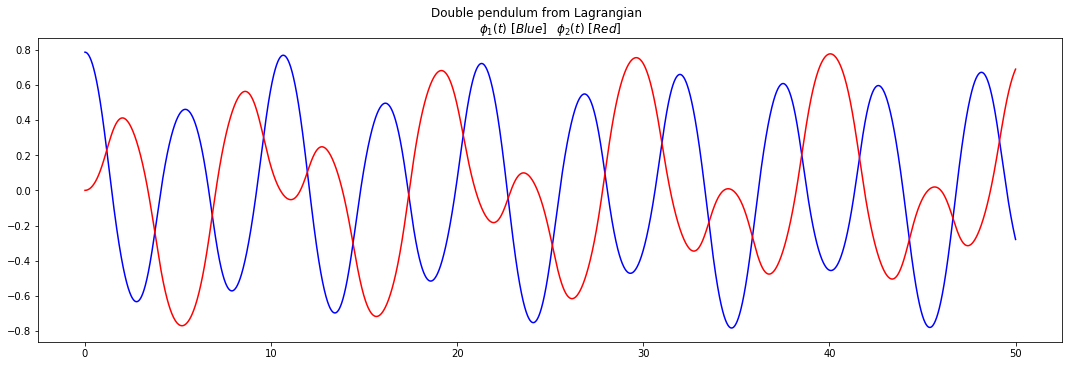

In [33]:
phi_1_0 = np.pi / 4.   # set some initial conditions
phi_2_0 = 0.
phi_1_dot_0 = 0.
phi_2_dot_0 = 0.

phi_1, phi_2, phi_dot_1, phi_dot_2 = Pend.solve_ode(t_pts = t_pts, phi_1_0 = phi_1_0 , phi_2_0 = phi_2_0, 
                                                    phi_dot_1_0 = phi_1_dot_0, phi_dot_2_0 = phi_2_dot_0 )
#solve for those initial conditions



#Plot!
fig = plt.figure(figsize =(15,5))

overall_title = 'Double pendulum from Lagrangian'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], phi_2[start : stop],  
            color='blue',
            label=None, 
            title=r'$\phi_1(t) \,\, [Blue] \,\,\,\,\, \phi_2(t) \,\, [Red]$', 
            ax=ax_a) 

fig.tight_layout()

<big> <big> Showing that this system is chaotic: We will take two solutions, with very slightly different initial conditions, take their difference, and plot it on a semilog plot. If the solutions diverge, then we know the system is chaotic, i.e., it has extreme sensitivity to initial conditions.

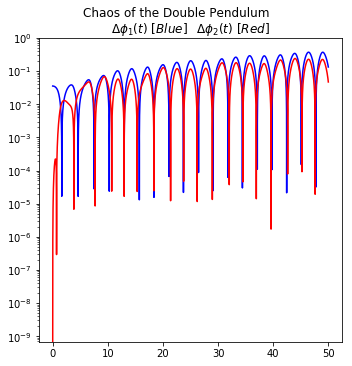

In [37]:
phi_1_1 = 0.75 #New initial conditions, just slightly off pi/4
phi_2_1 = 0.
phi_2_dot_1 = 0.
phi_1_dot_1 = 0.


#Solve a pendulum with these new conditions

phi_1prime, phi_2prime,phi_1_dotprime, phi_2_dotprime = Pend.solve_ode(t_pts = t_pts, phi_1_0 = phi_1_1 , 
                                                                       phi_2_0 = phi_2_1, phi_dot_1_0 = phi_1_dot_1,
                                                                       phi_dot_2_0 = phi_2_dot_1 )

deltaphi_1 = np.abs(phi_1prime - phi_1)
deltaphi_2 = np.abs(phi_2prime - phi_2) #take the difference of our two solutions


#plot the differences!
fig = plt.figure(figsize =(5,5))

overall_title = 'Chaos of the Double Pendulum'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], deltaphi_1[start : stop], deltaphi_2[start : stop],  
            color='blue',
            label=None, 
            title=r'$\Delta\phi_1(t) \,\, [Blue] \,\,\,\,\, \Delta\phi_2(t) \,\, [Red]$', 
            semilogy = True,
            ax=ax_a) 

fig.tight_layout()

We see that the plot of $\Delta\phi_1$ and $\Delta\phi_2$ both increase linearly on the semilog plot. This implies that the two solutions diverge exponentially, despite similar initial conditions, making this a chaotic system